Let's start by reading our Hacker News dataset into a pandas dataframe.

In [4]:
# Import the pandas library.
import pandas as pd

# Read the hacker_news.csv file into a pandas dataframe
hn = pd.read_csv("hacker_news.csv")

hn.head(10)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48
5,10557283,Nuts and Bolts Business Advice,NaN,3,4,shomberj,11/13/2015 0:45
6,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55
7,11337617,"Shims, Jigs and Other Woodworking Concepts to ...",http://firstround.com/review/shims-jigs-and-ot...,34,7,zt,3/22/2016 16:18
8,10379326,That self-appendectomy,http://www.southpolestation.com/trivia/igy1/ap...,91,10,jimsojim,10/13/2015 9:30
9,11370829,Crate raises $4M seed round for its next-gen S...,http://techcrunch.com/2016/03/15/crate-raises-...,3,1,hitekker,3/27/2016 18:08


In [9]:
hn.describe()

,id,num_points,num_comments
count,2.009900e+04,20099.000000,20099.000000
mean,1.131755e+07,50.296632,24.803025
std,6.964531e+05,107.110322,56.108639
min,1.017691e+07,1.000000,1.000000
25%,1.070172e+07,3.000000,1.000000
50%,1.128452e+07,9.000000,3.000000
75%,1.192613e+07,54.000000,21.000000
max,1.257898e+07,2553.000000,1733.000000


We're going to basic pattern searching using regex (re) to find out how many times Python is mentioned in the title of stories in our Hacker News dataset. We'll use a set to check for both Python with a capital 'P' and python with a lowercase 'p'.

In [13]:
import re
# extract a list, titles, containing all the titles from our dataset
titles = hn["title"].tolist()
# see if the data in the list look reasonable
titles[0:10]

['Interactive Dynamic Video',
 "Florida DJs May Face Felony for April Fools' Water Joke",
 'Technology ventures: From Idea to Enterprise',
 'Note by Note: The Making of Steinway L1037 (2007)',
 'Title II kills investment? Comcast and other ISPs are now spending more',
 'Nuts and Bolts Business Advice',
 'Ask HN: How to improve my personal website?',
 'Shims, Jigs and Other Woodworking Concepts to Conquer Technical Debt',
 'That self-appendectomy',
 'Crate raises $4M seed round for its next-gen SQL database']

In [23]:
python_mentions = 0
pattern = "[Pp]ython"
for title in titles:
    if (re.search(pattern, title)):
        python_mentions += 1
print("Python was mentioned {0} times out of {1} titles in our dataset".format(str(python_mentions),str(len(titles))))

Python was mentioned 160 times out of 20099 titles in our dataset


Let's replicate this using pandas vectorized methods to make use of speed and code efficiencies

In [32]:
pattern = '[Pp]ython'
titles = hn["title"]
python_mentions = titles.str.contains(pattern).sum()
print("Python was mentioned {0} times out of {1} titles in our dataset".format(python_mentions,len(titles)))

Python was mentioned 160 times out of 20099 titles in our dataset


Let's continue looking through the data set and select all titles that mention the programming language Ruby, using a set to account for whether the word is capitalized or not.

In [28]:
titles = hn['title']
ruby_titles = titles[titles.str.contains("[Rr]uby")]
ruby_titles.head(10)

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
2163                  Ruby 2.3 Is Only 4% Faster than 2.2
2306    Websocket Shootout: Clojure, C++, Elixir, Go, ...
2620                      Why Startups Use Ruby on Rails?
2645    Ask HN: Should I continue working a Ruby gem f...
3290    Ruby on Rails and the importance of being stup...
Name: title, dtype: object

In [31]:
print("Ruby was mentioned {0} times".format(ruby_titles.size))

Ruby was mentioned 48 times


Let's also find how many titles in our dataset mention email or e-mail.

In [34]:
pattern = "e-?mail"
email_bool = titles.str.contains(pattern)
email_count = email_bool.sum()
email_titles = titles[email_bool]
email_titles.head(10)

119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
2685         Ask HN: Weather forecast in your email daily
3379           Ask HN: How do we solve the email problem?
3865    What Mailchimp does to make sure emails get de...
3889    Show HN: Do you know what emails your competit...
3921     Im killing most of my email capture. Here's why.
Name: title, dtype: object

In [42]:
print("email was mentioned {0} times".format(len(email_titles.index)))

email was mentioned 86 times


In [45]:
email_titles.count()

86

Some stories submitted to Hacker News include a topic tag in brackets, like [pdf] or [video]. Let's find how many titles in our dataset have tags.

In [52]:
pattern = "\[\w+\]"
tag_titles = titles[titles.str.contains(pattern)]
tag_count = len(tag_titles.index)
tag_titles.head()

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object

In [53]:
print("Topic tags were mentioned {0} times".format(tag_count))

Topic tags were mentioned 444 times


What if we wanted to find out what the text of these tags were, and how many of each are in the dataset?

In [74]:
pattern = r"\[(\w+)\]"
tag_freq = titles.str.extract(pattern)[0].value_counts()
print("Total topic tags = {}".format(tag_count))
print("Top 15 most frequently mentioned tags were:")
print(tag_freq.head(15))

Total topic tags = 444
Top 15 most frequently mentioned tags were:
pdf           276
video         111
audio           3
2015            3
2014            2
slides          2
beta            2
png             1
JavaScript      1
ask             1
SpaceX          1
2008            1
USA             1
Beta            1
much            1
Name: 0, dtype: int64


pdf and video are by far the two most frequent tags mentioned in the headline titles of our Hacker News dataset. 

Now let's look for titles with the word "Java" or "java". This needs to exclude common variations like JavaScript, etc.

In [81]:
pattern = r"\b[Jj]ava\b"

java_titles = titles[titles.str.contains(pattern)]
pd.set_option('max_colwidth', 100)
print(java_titles.head(10))

436                       Unikernel Power Comes to Java, Node.js, Go, and Python Apps
811     Ask HN: Are there any projects or compilers which convert JavaScript to Java?
1023                                                     Pippo  Web framework in Java
1972                                      Node.js vs. Java: Which Is Faster for APIs?
2093                                                Java EE and Microservices in 2016
2367    Code that is valid in both PHP and Java, and produces the same output in both
2493      Ask HN: I've been a java dev for a couple of years, should I move langauge?
2751                                            Eventsourcing for Java 0.4.0 released
3228                                                          Comparing Rust and Java
3452      What are the Differences Between Java Platforms from Desktops to Wearables?
Name: title, dtype: object


In [82]:
print("Java mentioned {0} times".format(len(java_titles.index)))

Java mentioned 54 times


Let's use beginning and end anchors to count how many titles have tags at the start versus the end of the story title in our Hacker News dataset.

In [88]:
beginning_count = titles.str.contains(r"^\[\w+\]").sum()
ending_count = titles.str.contains(r"\[\w+\]$").sum()

In [89]:
print("Topic tags appeared {0} times at the start and {1} times at the end".format(beginning_count,ending_count))

Topic tags appeared 15 times at the start and 417 times at the end


Next, let's count the number of times that email is mentioned in story titles. We will have to check for all variations of email here such as eMail, Email, etc.

In [102]:
pattern = r"\be[- ]?mail"
# count the number of mentions of email in titles in the dataset
email_mentions = titles.str.contains(pattern,flags=re.I)
titles[email_mentions].head(10)

119                   Show HN: Send an email from your shell to yourself without pain
161     Computer Specialist Who Deleted Clinton Emails May Have Asked Reddit for Tips
174                                                                   Email Apps Suck
261         Emails Show Unqualified Clinton Foundation Donor Appointed to Intel Board
313                                     Disposable emails for safe spam free shopping
332                                                      Inky: Secure Email Made Easy
1361    Ask HN: Doing cold emails? helps us prove this concept for closing more leads
1750                  Protect yourself from spam, bots and phishing  disposable email
1774              From Email Introductions to Addressing Diversity Challenges in Tech
1900       Police Emails About Ahmed Mohamed: 'This Is What Happens When We Screw Up'
Name: title, dtype: object

In [103]:
print("Email appeared {0} times in the story titles in our data set".format(email_mentions.sum()))

Email appeared 143 times in the story titles in our data set


In [108]:
pattern = r"(\be[- ]?mail)"
email_freq = titles.str.extract(pattern,flags=re.I)[0].value_counts()
print(email_freq.head(15))

email     79
Email     56
e-mail     5
E-mail     2
E-Mail     1
Name: 0, dtype: int64


Use a case insensitive regex pattern that matches all case variations of the letters SQL in our dataset

In [118]:
pattern = r"\bsql\b"
sql_mentions = titles[titles.str.contains(pattern,flags=re.I)]
sql_counts = len(sql_mentions.index)
sql_mentions.head(10)

9                          Crate raises $4M seed round for its next-gen SQL database
394                                                     The History of SQL Injection
419     Pentesterlab Tutorial  SQL injection to web admin console to getting a shell
513                                                    Crab  SQL for your filesystem
1164                           Show HN: Migrate  Sane database/sql migrations for Go
1327                                                        Outlier Detection in SQL
1960                  Microsoft SQL Server Images Available on Google Compute Engine
2432                                          SQL for NoSQL: Couchbase N1QL Tutorial
2543                                             PacketQ: SQL queries for pcap files
2648                                 Hacking Microsoft SQL Server Without a Password
Name: title, dtype: object

In [121]:
print("SQL appeared {} times in the title in our dataset as a separate word".format(sql_counts))

SQL appeared 39 times in the title in our dataset as a separate word


In [120]:
titles.str.extract(r"(\bsql\b)",flags=re.I)[0].value_counts()

SQL    36
sql     3
Name: 0, dtype: int64

While SQL shows up separately as a word in the titles 39 times (36 times as SQL and 3 times as sql) if we further expand our search into titles where SQL is part of a word like NoSQL, we should see more mentions.

In [122]:
pattern = r"sql"
sql_mentions = titles[titles.str.contains(pattern,flags=re.I)]
sql_counts = len(sql_mentions.index)
sql_mentions.head(10)

9                          Crate raises $4M seed round for its next-gen SQL database
142                                             PostgreSQL: Linux VS Windows  part 2
221                                             MemSQL (YC W11) Raises $36M Series C
394                                                     The History of SQL Injection
419     Pentesterlab Tutorial  SQL injection to web admin console to getting a shell
513                                                    Crab  SQL for your filesystem
683                                                SQLite: The art of keep it simple
882                                       Pgmemcahe :A PostgreSQL memcache functions
1160                How to choose an in-memory NoSQL solution: Performance measuring
1164                           Show HN: Migrate  Sane database/sql migrations for Go
Name: title, dtype: object

In [123]:
print("SQL is mentioned {} times in the title in our dataset".format(sql_counts))

SQL is mentioned 108 times in the title in our dataset


So SQL shows up more frequently once we look at mentions inside other words like PostgreSQL and SQLite.  Let's look at titles that have letters immediately before the "SQL" which is a convention often used to denote different variations or flavors of SQL and create a frequency table to understand the usage of SQL a bit better:

In [135]:
pattern = r"(\w+sql)"
sql_flavors = titles.str.extract(pattern, flags=re.I)
sql_flavors[0].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
mySql          1
nosql          1
CloudSQL       1
SparkSQL       1
Name: 0, dtype: int64

The frequency table above shows some variations of nosql and mysql. Let's extract the mentions of different SQL flavors into a new column and clean those duplicates by making them all lowercase. We'll then analyze the results to look at the average number of comments for each flavor.

In [138]:
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()
hn_sql["flavor"] = hn_sql["title"].str.extract(r"(\w+SQL)", flags=re.I)[0].str.lower()
# create a pivot table to look at the grouped data
sql_pivot = hn_sql.pivot_table(index="flavor", values="num_comments")
print(sql_pivot)

            num_comments
flavor                  
cloudsql        5.000000
memsql         14.000000
mysql          12.230769
nosql          14.529412
postgresql     25.962963
sparksql        1.000000


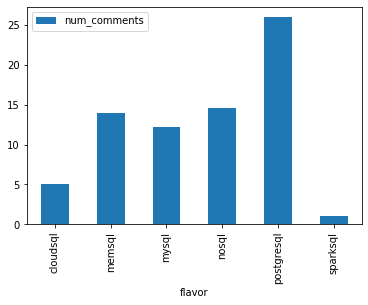

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
sql_pivot.plot(kind="bar")

There are flavors that have letters after SQL as well, so let's look at those flavors of SQL as well.

In [145]:
pattern = r"(sql\w+)"
sql_flavors = titles.str.extract(pattern, flags=re.I)
sql_flavors[0].value_counts()

SQLite    12
SqlPad     1
Sqlite     1
Sqlata     1
Name: 0, dtype: int64

Let's revert to our previous analysis with mentions of Python in our dataset. Here are some samples of Hacker News titles that mention Python: 

In [148]:
pattern = '[Pp]ython'
python_mentions = titles[titles.str.contains(pattern)]
python_mentions.head(10)

102                                                From Python to Lua: Why We Switched
103                                          Ubuntu 16.04 LTS to Ship Without Python 2
144                            Create a GUI Application Using Qt and Python in Minutes
196    How I Solved GCHQ's Xmas Card with Python and Pycosat. (Explanation and Source)
436                        Unikernel Power Comes to Java, Node.js, Go, and Python Apps
451           Developing a computational pipeline using the asyncio module in Python 3
536                                    Show HN: Minimal, modern embedded V8 for Python
580                          Python integration for the Duktape Javascript interpreter
740                     Python 3 on Google App Engine flexible environment now in beta
765                               IronPython 3 (python for .net) development restarted
Name: title, dtype: object

Some of these titles have a number after the word "Python" which indicates a version number. Let's capture the version number after the word "Python" if present, and then build a frequency table of the different versions.

In [157]:
pattern = r"[Pp]ython ([\d.]+)"
py_versions = titles.str.extract(pattern)
py_versions_freq = py_versions[0].value_counts()
py_versions_freq.head(10)

pandas.core.series.Series

In [158]:
py_versions_freq = dict(py_versions_freq)
py_versions_freq

{'3': 10,
 '3.5': 3,
 '2': 3,
 '3.6': 2,
 '8': 1,
 '2.7': 1,
 '1.5': 1,
 '3.5.0': 1,
 '4': 1}